In [103]:
import pandas as pd 

import seaborn as sns

import numpy as np 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy import stats 
from scipy.stats import norm    

from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import csv

import warnings
warnings.filterwarnings('ignore')

In [104]:
dataFrame = pd.read_csv('KS_train_data.csv')

In [105]:
print(dataFrame.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [106]:
dataFrame.head(10)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.00,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.00,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,1332991739,MyPhoneHenge,5217.00,False,5217.00,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,1332991696,Walk-Through,7160.00,False,7160.00,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.00,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
5,KS_000005,18,Source Material is 2 person exhibition of the ...,art,2190,US,1331239703,USD,1336090320,1.0,...,1333017856,Source Material: Works by Brian Dupont and Chr...,2190.00,False,2190.00,"Houston, TX",True,painting,https://www.kickstarter.com/projects/973860748...,https://www.kickstarter.com/projects/973860748...
6,KS_000006,156,An anthropological field study of the Dwarven ...,art,5429,US,1332802530,USD,1334030340,1.0,...,1333045464,A Book of Dwarves,5429.95,False,5429.95,"Chicago, IL",True,art,https://www.kickstarter.com/projects/136757708...,https://www.kickstarter.com/projects/136757708...
7,KS_000007,479,Portrait artist seeks funds to kickstart an ex...,art,62736,US,1331325438,USD,1335671940,1.0,...,1332822807,Drawing a Drawing 365,62736.01,True,62736.01,"New Britain, CT",True,painting,https://www.kickstarter.com/projects/michaelsh...,https://www.kickstarter.com/projects/michaelsh...
8,KS_000008,41,This is a month long Residency at the The Verm...,art,2930,US,1331904129,USD,1336736610,1.0,...,1332848610,The Vermont Studio Center Artist Residency Pro...,2930.00,True,2930.00,"Johnson, VT",True,painting,https://www.kickstarter.com/projects/106325273...,https://www.kickstarter.com/projects/106325273...
9,KS_000009,25,"Art, Music, and Theater live on the Waterfront...",art,5001,US,1330979179,USD,1335443088,1.0,...,1332851088,Arts on the Waterfront,5001.00,False,5001.00,"Seattle, WA",True,public art,https://www.kickstarter.com/projects/139851890...,https://www.kickstarter.com/projects/139851890...


***
```
COL's VARS:

1)project_id
2)backers_count : number of supporters of the project (quantitative)
3)blurb : description of the project (qualitative)
4)category (qualitative)
5)converted_pledged_amount : funding amount ?? (quantitative). It's into integers
6)country (qualitative)
7)created_at (quantitative)
8)currency (qualitative)
9)deadline (quanatitative)
10)fx_rate : exchange rate (quantitative)
11)goal : goal of expected fundings (quantitative)
12)launched_at: (quantitative)
13)name : name of the project (qualitative)
14)pledged : funding amount ?? (quantitative). It's into floats (.00)
15)staff_pick : projects picked or not picked (Boolean -> True/False)
16)usd_pledged : funding amount in dollars ?? (quantitative). It's into floats (.00) != pledged
17)location: City, State(abbreviation)/Country 
18)funded : projects funded or not funded (Boolean -> True/False) --> MOST IMPORTANT
19)subcategory (qualitative)
20)project_url (link)
21)reward_url (link)

```
***

In [107]:
dataFrame['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

***
```
Most projects have been funded (58454) compared to (41546) not funded

```
***

In [108]:
dataFrame['project_time'] = [ row.deadline - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['create_to_launch_time'] = [ row.launched_at - row.created_at for index, row in dataFrame.iterrows() ]
dataFrame['launch_to_deadline_time'] = [ row.deadline - row.launched_at for index, row in dataFrame.iterrows() ]

# Data Cleaning

In [109]:
dataFrame['deadline_in_dataFormat']= pd.to_datetime(dataFrame['deadline'],origin='unix',unit='s')
dataFrame['created_at_in_dataFormat']= pd.to_datetime(dataFrame['created_at'],origin='unix',unit='s')
dataFrame['launched_at_in_dataFormat']= pd.to_datetime(dataFrame['launched_at'],origin='unix',unit='s')
dataFrame['deadline_in_dataFormat'].head()

0   2012-04-19 20:16:00
1   2012-05-08 01:22:25
2   2012-05-28 03:28:59
3   2012-04-19 03:28:16
4   2012-04-28 03:37:20
Name: deadline_in_dataFormat, dtype: datetime64[ns]

In [110]:
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [project_id, backers_count, blurb, category, converted_pledged_amount, country, created_at, currency, deadline, fx_rate, goal, launched_at, name, pledged, staff_pick, usd_pledged, location, funded, subcategory, project_url, reward_url, project_time, create_to_launch_time, launch_to_deadline_time, deadline_in_dataFormat, created_at_in_dataFormat, launched_at_in_dataFormat]
Index: []

[0 rows x 27 columns]


There are no duplicate rows.

In [111]:
(dataFrame.isnull()).sum()

project_id                   0
backers_count                0
blurb                        2
category                     0
converted_pledged_amount     0
country                      3
created_at                   0
currency                     0
deadline                     0
fx_rate                      0
goal                         0
launched_at                  0
name                         1
pledged                      0
staff_pick                   0
usd_pledged                  0
location                     0
funded                       0
subcategory                  0
project_url                  0
reward_url                   0
project_time                 0
create_to_launch_time        0
launch_to_deadline_time      0
deadline_in_dataFormat       0
created_at_in_dataFormat     0
launched_at_in_dataFormat    0
dtype: int64

In [112]:
dataFrame = dataFrame.dropna(how='any',axis=0)

In [113]:
(dataFrame.isnull()).sum()

project_id                   0
backers_count                0
blurb                        0
category                     0
converted_pledged_amount     0
country                      0
created_at                   0
currency                     0
deadline                     0
fx_rate                      0
goal                         0
launched_at                  0
name                         0
pledged                      0
staff_pick                   0
usd_pledged                  0
location                     0
funded                       0
subcategory                  0
project_url                  0
reward_url                   0
project_time                 0
create_to_launch_time        0
launch_to_deadline_time      0
deadline_in_dataFormat       0
created_at_in_dataFormat     0
launched_at_in_dataFormat    0
dtype: int64

We removed all the rows with null v alues

Find the lenght of the blurb(description) of each project

In [114]:
dataFrame['blurb_lenght'] = dataFrame['blurb'].str.len()

Find the goal amount in USD using the fx_rate

In [115]:
dataFrame['goal_usd'] = (dataFrame['goal'] * dataFrame['fx_rate'])

# Data Analysis

Number of prjects that were founded and not

<AxesSubplot:>

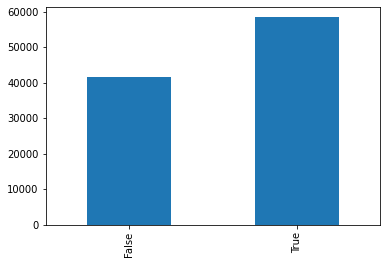

In [116]:
dataFrame['funded'].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:ylabel='category'>

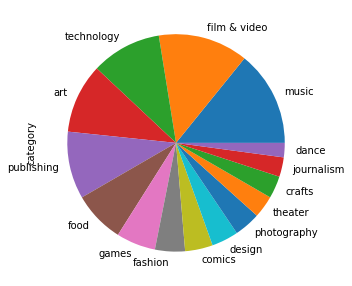

In [117]:
(dataFrame['category'].value_counts()/len(dataFrame)).plot.pie(y='mass', figsize=(5, 5))

In [118]:
dataFrame['country'].value_counts()

US    76715
GB     8015
CA     3511
AU     1793
DE      968
      ...  
PY        1
NC        1
TJ        1
LY        1
XK        1
Name: country, Length: 174, dtype: int64

Check if all the values of the most relevant columns are consistent with each other

In [119]:
np.issubdtype(dataFrame['goal'].dtype, np.number)

True

In [120]:
np.issubdtype(dataFrame['staff_pick'].dtype, np.bool)

True

In [121]:
np.issubdtype(dataFrame['funded'].dtype, np.bool)

True

There are no typos

In [122]:
dataFrame['proj_time_days_duration'] = (dataFrame.deadline_in_dataFormat - dataFrame.launched_at_in_dataFormat)
dataFrame['proj_time_days_duration'] = dataFrame['proj_time_days_duration'].dt.days
dataFrame['proj_time_days_duration'].head()

0    21
1    40
2    60
3    21
4    30
Name: proj_time_days_duration, dtype: int64

((array([-4.34601058, -4.14723433, -4.03911836, ...,  4.03911836,
          4.14723433,  4.34601058]),
  array([1.e-02, 1.e+00, 1.e+00, ..., 1.e+08, 1.e+08, 1.e+08])),
 (124555.63922410453, 44476.7193289665, 0.09915957783698098))

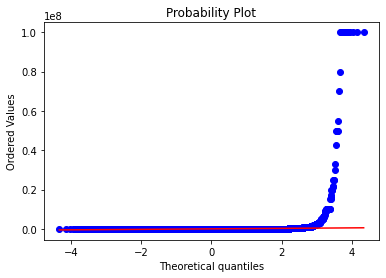

In [123]:
stats.probplot(dataFrame["goal"],plot=plt)

In [124]:
dataFrame['log_goal'] = np.log(dataFrame['goal_usd'])
dataFrame['log_project_time'] = np.log(dataFrame['project_time'])

<AxesSubplot:xlabel='log_goal', ylabel='category'>

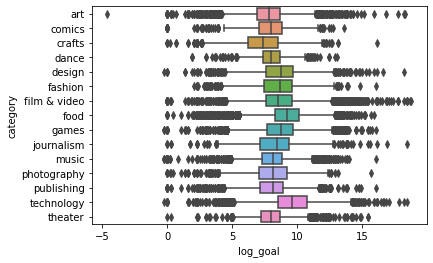

In [125]:
sns.boxplot(x=dataFrame.log_goal, y=dataFrame.category)

In [126]:
dff = dataFrame[dataFrame.category == "art"]
dff.project_id.describe()

count         10344
unique        10344
top       KS_007344
freq              1
Name: project_id, dtype: object

<AxesSubplot:xlabel='log_goal', ylabel='log_project_time'>

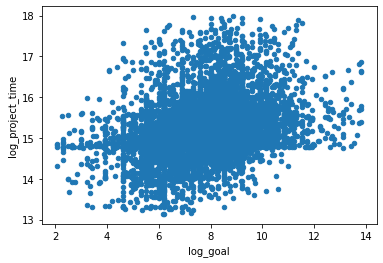

In [127]:
dff = dff[dff.log_goal > 2]
dff = dff[dff.log_goal < 14]
dff = dff[dff.log_project_time > 13]
dff = dff[dff.log_project_time < 18]
dff.plot.scatter(x = "log_goal", y = "log_project_time")

In [128]:
dff.project_id.describe()

count         10236
unique        10236
top       KS_007344
freq              1
Name: project_id, dtype: object

In [129]:
dfTech = dataFrame[dataFrame.category == "technology"]
dfTech.project_id.describe()

count         10456
unique        10456
top       KS_088810
freq              1
Name: project_id, dtype: object

<AxesSubplot:xlabel='log_goal', ylabel='log_project_time'>

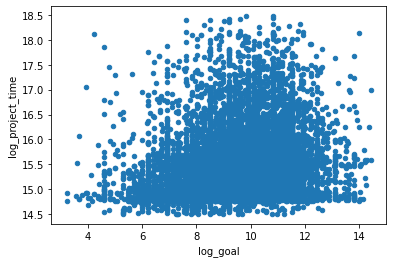

In [130]:
dfTech = dfTech[dfTech.log_goal < 14.5]
dfTech = dfTech[dfTech.log_goal > 3]
dfTech = dfTech[dfTech.log_project_time > 14.5]
dfTech = dfTech[dfTech.log_project_time < 18.5]
dfTech.plot.scatter(x = "log_goal", y = "log_project_time")

In [131]:
dfTech.project_id.describe()

count         10102
unique        10102
top       KS_088810
freq              1
Name: project_id, dtype: object

<AxesSubplot:xlabel='log_goal', ylabel='log_project_time'>

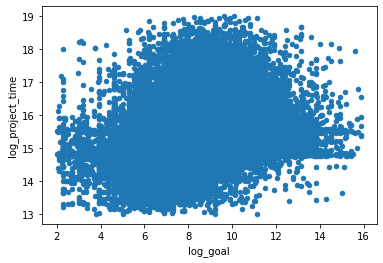

In [132]:
dataFrame = dataFrame[dataFrame.log_goal > 2]
dataFrame = dataFrame[dataFrame.log_goal < 16]
dataFrame = dataFrame[dataFrame.log_project_time > 13]
dataFrame = dataFrame[dataFrame.log_project_time < 19]

dataFrame.plot.scatter(x = "log_goal", y = "log_project_time")

Caps outliers to closest existing value within threshold (IQR).
Identifying the upper bound for most relevant quantitative variables, and dropping the outliers accordingly.

However, using this method we were dropping to many projects from the dataFrame, which would make the sets for training and testing smaller

In [133]:
#def cap_outliers(series, iqr_threshold=1.5, verbose=False):
#    '''Caps outliers to closest existing value within threshold (IQR).'''
#    Q1 = series.quantile(0.25)
#    Q3 = series.quantile(0.75)
#    IQR = Q3 - Q1
#
#    lbound = Q1 - iqr_threshold * IQR
#    ubound = Q3 + iqr_threshold * IQR
#
#    outliers = (series < lbound) | (series > ubound)
#
#    series = series.copy()
#    series.loc[series < lbound] = series.loc[~outliers].min()
#    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
#    if verbose:
#            print('\n'.join(
#                ['Capping outliers by the IQR method:',
#                 f'   IQR threshold: {iqr_threshold}',
#                 f'   Lower bound: {lbound}',
#                 f'   Upper bound: {ubound}\n']))
#
#    return series

In [134]:
#cap_outliers(dataFrame['goal'], verbose=True)
#converted_pledged_amount_to_drop_upper_bound = dataFrame.index[dataFrame.goal > 27750]
#converted_pledged_amount_to_drop_lower_bound = dataFrame.index[dataFrame.goal < -14250]
#dataFrame.drop(converted_pledged_amount_to_drop_lower_bound, inplace=True)
#dataFrame.drop(converted_pledged_amount_to_drop_upper_bound, inplace=True)
#dataFrame.goal.describe()

Derive a new column called funded_amount_per_backer as the first additional feature, and check if it was funded, if thats the case divide them, else assign 0.

In [135]:
le = LabelEncoder()
dataFrame['category_no'] = le.fit_transform(dataFrame['category'])
dataFrame['subcategory_no'] = le.fit_transform(dataFrame['subcategory'])
dataFrame['country_no'] = le.fit_transform(dataFrame['country'])

<AxesSubplot:>

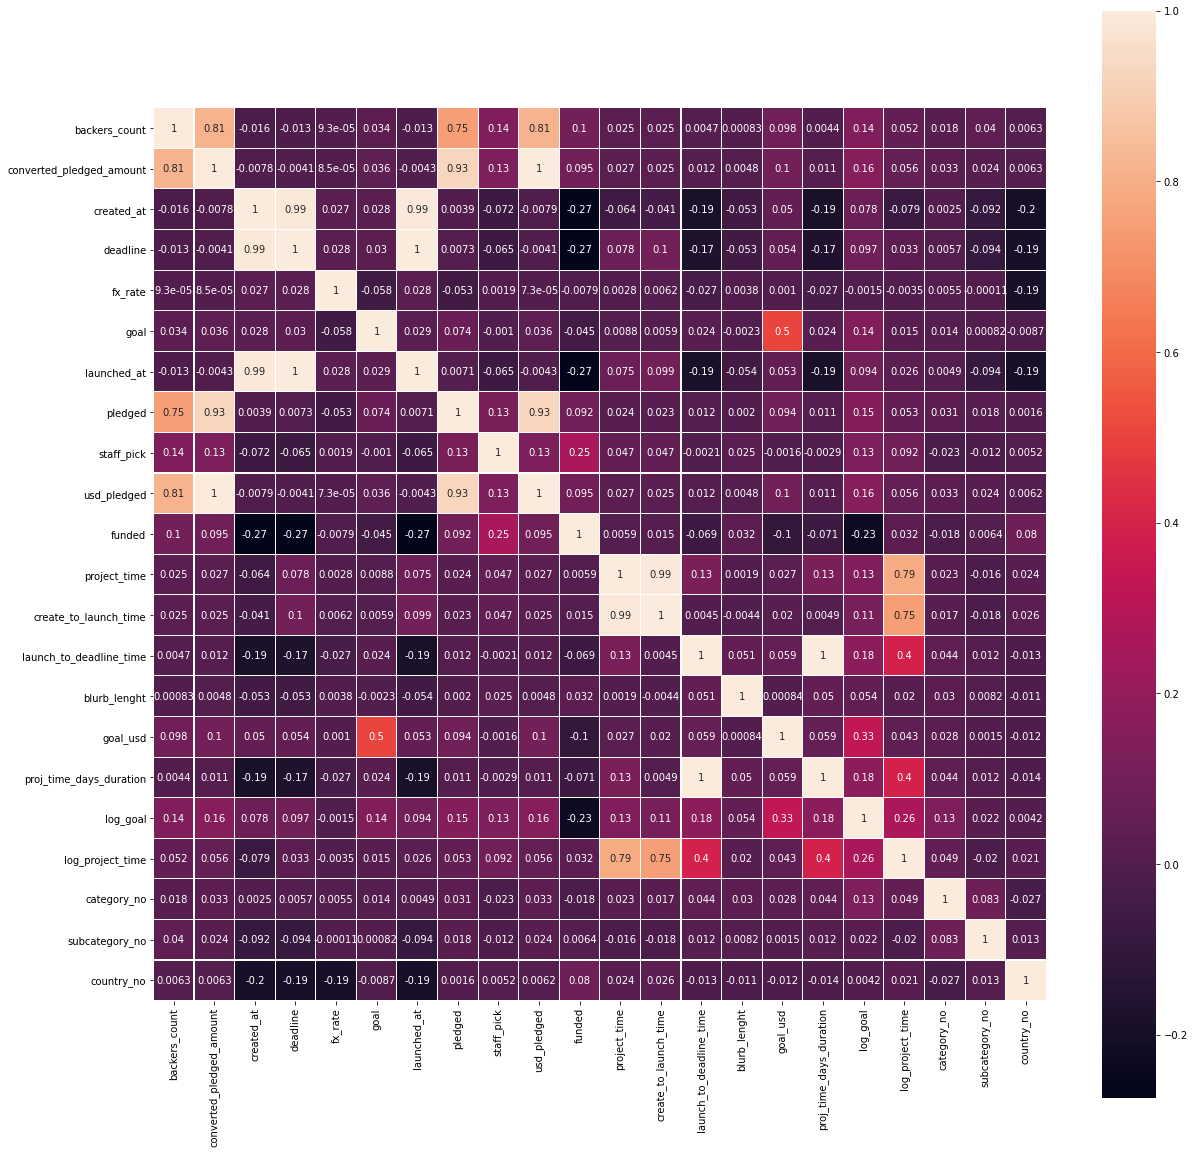

In [136]:
corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Addition of the second feature named project_time which represents the duration of the project since its creation until its deadline.

<AxesSubplot:>

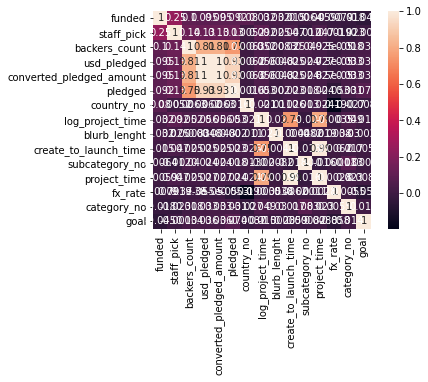

In [137]:
corrmat = dataFrame.corr()
cols = corrmat.nlargest(15, 'funded').index
sns.heatmap(corrmat.loc[cols, cols], square= True, annot = True)

<AxesSubplot:>

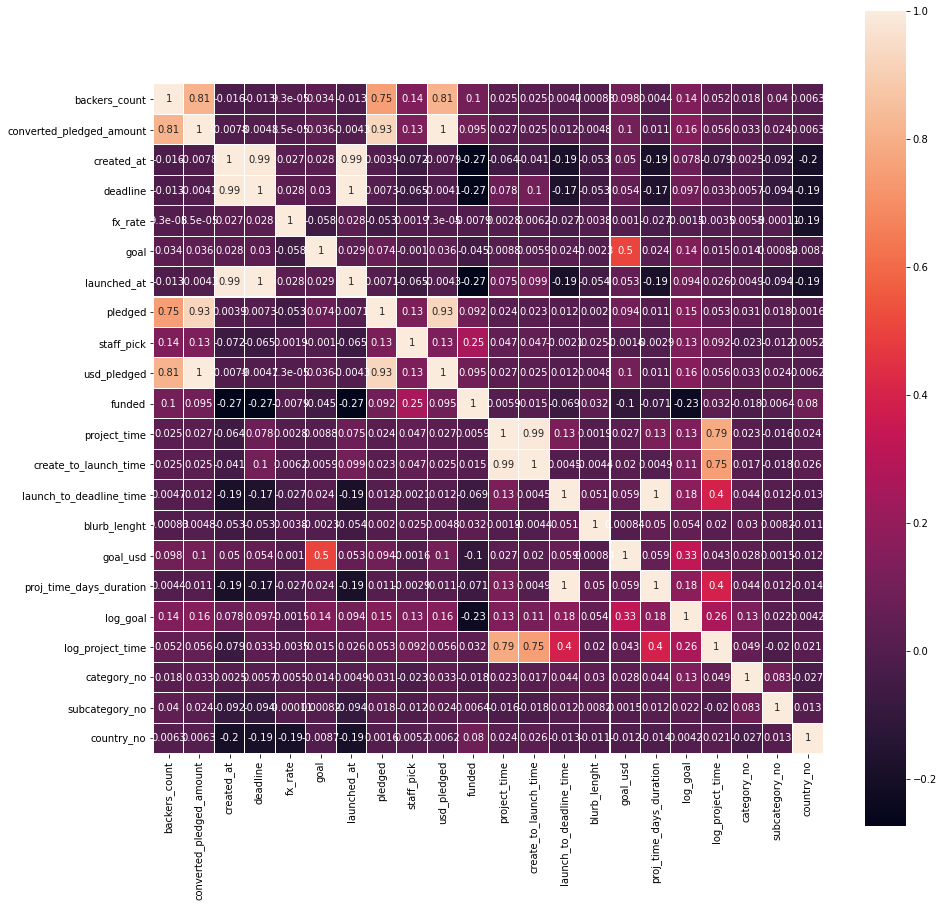

In [138]:
dataFrame.head(3)

corrmat = dataFrame.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrmat, square= True, annot = True, linewidths=.1, ax=ax)

Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

X =dataFrame[['goal_usd', 'created_at', 'deadline', 'category_no', 'subcategory_no', 'staff_pick','country_no','proj_time_days_duration','blurb_lenght']]  # Known features
y = dataFrame['funded']  # To be predicted

# Split the dataset into a training- and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)

# Train the model with the training features
clf.fit(X_train,y_train)

y_pred = clf.predict(X_val)

# Correctness of the classifier (slightly different everytime)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8061116965226555


In [ ]:
from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
n_estimators = [10,50,80,100,150,200]
# empty list that will hold cv scores
cv_scores = []
for k in n_estimators:
    clf = RandomForestClassifier(n_estimators=k, max_depth=None,
    min_samples_split=2, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_n_index = MSE.index(min(MSE))
optimal_n = n_estimators[optimal_n_index]
print(optimal_n)

We found out using cross validation that 100 is the best number of estimators

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Correctness of the classifier (slightly different everytime)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print (clf.score(X_test,y_test))

dataFrame['FundedPre'] = clf.predict(X)
dataFrame.FundedPre.describe()

In [ ]:
dataFrame['FundedPre'] = clf.predict(X)
dataFrame['FundedPre'] = clf.predict_proba(X)

In [ ]:
dataFrame['predictedFunded'] = np.where(dataFrame['FundedPre'] < 0.5, True, False)

In [ ]:
dataFrame['predicted_correctly'] = np.where(dataFrame['predictedFunded'] == dataFrame['funded'], True, False)
dataFrame.predicted_correctly.describe()

Code to split set in train,val,test set 60,20,20

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size= 0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, test_size=0.25, random_state=1) #train, val, test set will be 60%, 20%, 20% 

KNeighbours

Acuuracy score is 0.6327462491846053
59


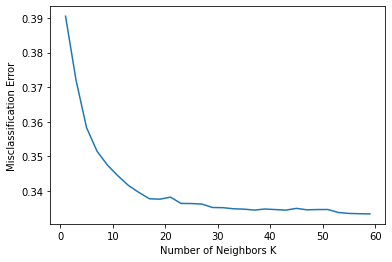

In [182]:
from sklearn.neighbors import KNeighborsClassifier

X =dataFrame[['goal_usd', 'created_at', 'deadline', 'category_no', 'subcategory_no', 'staff_pick','country_no','proj_time_days_duration','blurb_lenght']]  # Known features
y = dataFrame['funded']  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)
print('Acuuracy score is {}'.format(metrics.accuracy_score(y_test, y_pred)))

from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,60) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

We find the best n_neighbour to use

In [185]:
from sklearn.neighbors import KNeighborsClassifier
X =dataFrame[['goal_usd', 'created_at', 'deadline', 'category_no', 'subcategory_no', 'staff_pick','country_no','proj_time_days_duration','blurb_lenght']]  # Known features
y = dataFrame['funded']  # To be predicted  # To be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 59)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Acuuracy score is {}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

Acuuracy score is 66.74193386522154%
Log-loss: 11.487060135013047


Open test data file

In [176]:
dataFrameTest = pd.read_csv('KS_test_data.csv', delimiter=';')

In [177]:
dataFrameTest = dataFrameTest.dropna(how='any',axis=0)

Training data set addition of new columns 

In [178]:
le = LabelEncoder()
dataFrameTest['deadline_in_dataFormat']= pd.to_datetime(dataFrameTest['deadline'],origin='unix',unit='s')
dataFrameTest['created_at_in_dataFormat']= pd.to_datetime(dataFrameTest['created_at'],origin='unix',unit='s')
dataFrameTest['launched_at_in_dataFormat']= pd.to_datetime(dataFrameTest['launched_at'],origin='unix',unit='s')

dataFrameTest['category_no'] = le.fit_transform(dataFrameTest['category'])
dataFrameTest['subcategory_no'] = le.fit_transform(dataFrameTest['subcategory'])
dataFrameTest['country_no'] = le.fit_transform(dataFrameTest['country'])
dataFrameTest['proj_time_days_duration'] = (dataFrameTest.deadline_in_dataFormat - dataFrameTest.launched_at_in_dataFormat)
dataFrameTest['proj_time_days_duration'] = dataFrameTest['proj_time_days_duration'].dt.days
dataFrameTest['blurb_lenght'] = dataFrameTest['blurb'].str.len()
dataFrameTest['goal_usd'] = (dataFrameTest['goal'] * dataFrameTest['fx_rate'])

In [179]:
dataFrameTest.head(10)

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,...,reward_url,deadline_in_dataFormat,created_at_in_dataFormat,launched_at_in_dataFormat,category_no,subcategory_no,country_no,proj_time_days_duration,blurb_lenght,goal_usd
0,KS_100000,We are looking to bring a Visiting Sculptor fr...,art,US,1330727362,USD,1334959598,1.0,3900.0,1332972398,...,https://www.kickstarter.com/projects/153685020...,2012-04-20 22:06:38,2012-03-02 22:29:22,2012-03-28 22:06:38,0,10,162,23,135,3900.0
1,KS_100001,Surrealistic oil paintings capturing the metam...,art,US,1332598567,USD,1334635140,1.0,750.0,1332975679,...,https://www.kickstarter.com/projects/203971390...,2012-04-17 03:59:00,2012-03-24 14:16:07,2012-03-28 23:01:19,0,95,162,19,90,750.0
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 a...,art,US,1332476607,USD,1333421843,1.0,1000.0,1332989843,...,https://www.kickstarter.com/projects/144231475...,2012-04-03 02:57:23,2012-03-23 04:23:27,2012-03-29 02:57:23,0,95,162,5,61,1000.0
3,KS_100003,A series of images about the art/artist and lo...,art,US,1327538509,USD,1338231398,1.0,15000.0,1333047398,...,https://www.kickstarter.com/projects/199636585...,2012-05-28 18:56:38,2012-01-26 00:41:49,2012-03-29 18:56:38,0,113,162,60,134,15000.0
4,KS_100004,Become a part of the first crowd-funded commun...,art,US,1332705528,USD,1334606400,1.0,4200.0,1333049586,...,https://www.kickstarter.com/projects/jimgroom/...,2012-04-16 20:00:00,2012-03-25 19:58:48,2012-03-29 19:33:06,0,36,162,18,100,4200.0
5,KS_100005,I will be creating an artist book edition at M...,art,US,1330042590,USD,1335758400,1.0,2500.0,1332961593,...,https://www.kickstarter.com/projects/938956896...,2012-04-30 04:00:00,2012-02-24 00:16:30,2012-03-28 19:06:33,0,86,162,32,122,2500.0
6,KS_100006,Inside these pages are the building blocks of ...,art,US,1321976772,USD,1335559247,1.0,9000.0,1332967247,...,https://www.kickstarter.com/projects/832720854...,2012-04-27 20:40:47,2011-11-22 15:46:12,2012-03-28 20:40:47,0,69,162,30,125,9000.0
7,KS_100007,Bobo's Bayou will be making its debut at the M...,art,US,1329377445,USD,1331971953,1.0,3500.0,1329383553,...,https://www.kickstarter.com/projects/338398024...,2012-03-17 08:12:33,2012-02-16 07:30:45,2012-02-16 09:12:33,0,113,162,29,113,3500.0
8,KS_100008,Larger metal creatures arise in this undergrad...,art,US,1329226762,USD,1332727200,1.0,700.0,1329431235,...,https://www.kickstarter.com/projects/161524146...,2012-03-26 02:00:00,2012-02-14 13:39:22,2012-02-16 22:27:15,0,127,162,38,134,700.0
9,KS_100009,This is a Salsa Concept Video. I am choreogra...,art,US,1329504699,USD,1330995600,1.0,1500.0,1329530087,...,https://www.kickstarter.com/projects/danelladu...,2012-03-06 01:00:00,2012-02-17 18:51:39,2012-02-18 01:54:47,0,97,162,16,130,1500.0


In [180]:
x =dataFrameTest[['goal_usd', 'created_at', 'deadline', 'category_no', 'subcategory_no', 'staff_pick','country_no','proj_time_days_duration','blurb_lenght']]  # Known features
dataFrameTest['funded'] = clf.predict(x)
dataFrameTest.funded.describe()

count     78060
unique        2
top        True
freq      44629
Name: funded, dtype: object

Create predictions.tsv file and save project_id and funded prediction 

<!-- We maybe removed too much data as now the countis 73906 out of 100K -->

In [181]:
dataFrameTest.to_csv('predictions.tsv', sep='\t', columns=['project_id','funded'], header=False, index=False)